# Seaborn Visualization and Plot Customization Techniques

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']
quakes = pd.read_csv('data/earthquakes.csv')

Using seaborn, create a heatmap to visualize the correlation coefficients between
earthquake magnitude and whether there was a tsunami for earthquakes measured
with the mb magnitude type.

Text(0.5, 1.0, 'Correlation between earthquake magnitude of mb type and whether there was a tsunami')

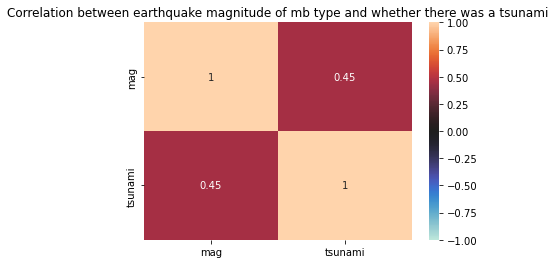

In [10]:
sns.heatmap(
    quakes.query('magType=="mb"')[['mag','tsunami']].corr(), 
    annot=True, center=0, vmin=-1, vmax=1
)
plt.title("Correlation between earthquake magnitude of mb type and whether there was a tsunami")

<AxesSubplot:>

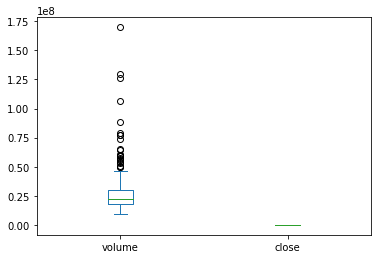

In [46]:
fb[['volume','close']].plot(kind='box')

Plot the evolution of cumulative COVID-19 cases worldwide, and add a dashed
vertical line on the date that it surpassed 1 million. Be sure to format the tick labels
on the y-axis accordingly.

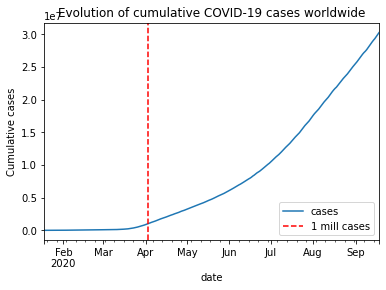

In [41]:
cum_cases = covid.groupby(pd.Grouper(freq='1D')).sum().cases.cumsum()
time = cum_cases[cum_cases>=1000000].index.tolist()[0]
cum_cases.plot(title='Evolution of cumulative COVID-19 cases worldwide')
plt.ylabel('Cumulative cases')
plt.axvline(x=time,color='r',linestyle='--',label="1 mill cases")
plt.legend(loc='lower right')

Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31',
which marks the large decline in Facebook price on a line plot of the closing price.

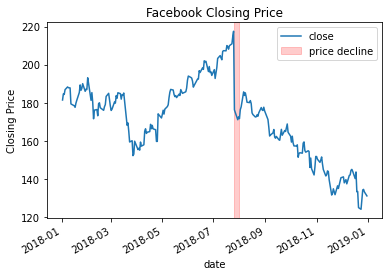

In [56]:
fb[['close']].plot()
plt.title("Facebook Closing Price")
plt.ylabel("Closing Price")
plt.axvspan('2018-07-25','2018-07-31',color='r',alpha=0.2,label='price decline')
plt.legend()

Using the Facebook stock price data, annotate the following three events on a line
plot of the closing price:
a) Disappointing user growth announced after close on July 25, 2018
b) Cambridge Analytica story breaks on March 19, 2018 (when it affected the
market)
c) FTC launches investigation on March 20, 2018

Text(2018-01-01, 130, 'FTC Investigation')

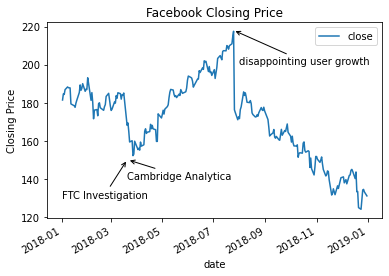

In [80]:
fb[['close']].plot()
plt.title("Facebook Closing Price")
plt.ylabel("Closing Price")
plt.annotate('disappointing user growth',
             xy=('2018-07-25',218),
             xytext=('2018-07-31',200),
            arrowprops={'arrowstyle':'->'}
            )
plt.annotate('Cambridge Analytica',
             xy=('2018-03-21',150),
             xytext=('2018-03-20',140),
            arrowprops={'arrowstyle':'->'}
            )
plt.annotate('FTC Investigation',
             xy=('2018-03-20',150),
             xytext=('2018-01-01',130),
            arrowprops={'arrowstyle':'->'}
            )

Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [103]:
import itertools
from matplotlib import cm

def reg_resid_plots(data):
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)
    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        [cm.gist_rainbow(i) for i in range(len(ax))]
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)

            if func == sns.residplot:
                # mark the residuals as such
                subplot.set_ylabel('residuals')
    return fig.axes

[<AxesSubplot:xlabel='open', ylabel='close'>,
 <AxesSubplot:xlabel='open', ylabel='residuals'>,
 <AxesSubplot:xlabel='close', ylabel='open'>,
 <AxesSubplot:xlabel='close', ylabel='residuals'>]

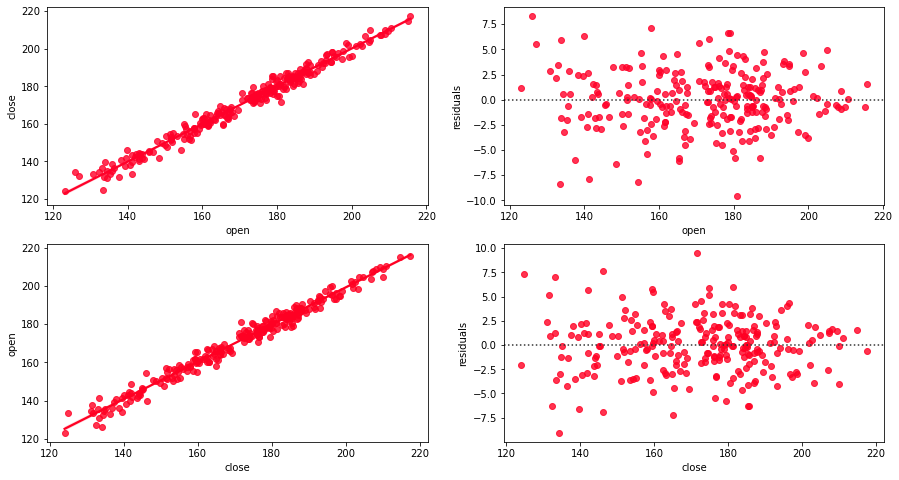

In [104]:
reg_resid_plots(fb[['open','close']])